In [1]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from bert_score import score, BERTScorer
import matplotlib.pyplot as plt
from transformers import pipeline

In [3]:
df_baseline = pd.read_csv('falcon7b_baseline_eval.csv')
df_qa = pd.read_csv('andrew_fine_tune_falcon_7b.csv')
df_raw = pd.read_csv('falcon7b_finetuned_eval.csv')

In [8]:
scorer = BERTScorer(lang="en", rescale_with_baseline=True)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
df_baseline

,questions,answer,model_answer,BERTScore_f1,BERTScore_precision,BERTScore_recall
0,What is an eigenvector of a matrix?,An eigenvector of a matrix is a nonzero vector...,an eigenvector for a matrix is a column vector...,0.856095,0.879788,0.833645
1,How does the second hidden layer of a deep lea...,Given the first hidden layer's description of ...,"The second layer, or hidden layer, of a deep l...",0.848625,0.865913,0.832013
2,What is the significance of an inner product i...,An inner product in a vector space provides a ...,The significance of an inner product is that i...,0.872372,0.897827,0.848321
3,What background is assumed for readers of the ...,The book assumes readers have a computer scien...,I assume readers of the 'Deep Learning' book h...,0.900700,0.896025,0.905425
4,What are the main goals of statistical learnin...,The main goals of statistical learning are to ...,The main goals of statistical learning in data...,0.931371,0.933579,0.929173
...,...,...,...,...,...,...
123,How does deep learning address the challenge o...,Deep learning introduces representations in te...,Deep learning addresses the challenge of repre...,0.865792,0.883687,0.848607
124,What is 'outlier detection' in machine learning?,Outlier detection in machine learning is the i...,Outlier detection in machine learning is the p...,0.905499,0.912501,0.898605
125,What is 'long short-term memory' (LSTM) in mac...,Long short-term memory (LSTM) in machine learn...,Long short-term memory (LSTM) in machine learn...,0.911162,0.922170,0.900414
126,What is 'hyperparameter tuning' in machine lea...,Hyperparameter tuning in machine learning invo...,Hyperparameter tuning is a process to optimize...,0.920736,0.927379,0.914188


In [21]:
questions_BL = df_baseline['questions'].tolist()
ideal_answers_BL = df_baseline['answer'].tolist()
gen_answers_BL = df_baseline['model_answer'].tolist()

In [22]:
P_BL, R_BL, F1_BL = scorer.score(gen_answers_BL, ideal_answers_BL)

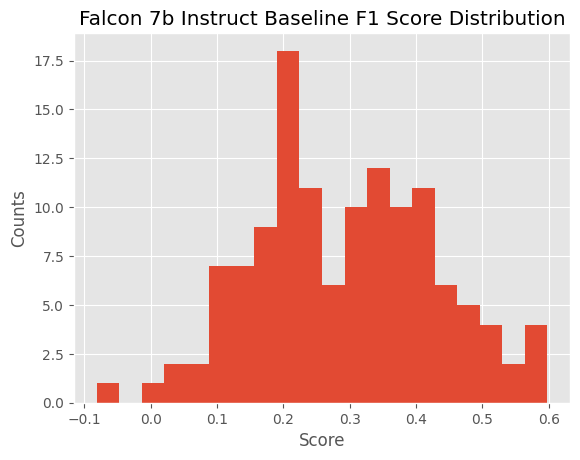

In [23]:
plt.hist(F1_BL, bins=20)
plt.xlabel("Score")
plt.ylabel("Counts")
plt.title('Falcon 7b Instruct Baseline F1 Score Distribution')
plt.style.use('ggplot')
plt.show()


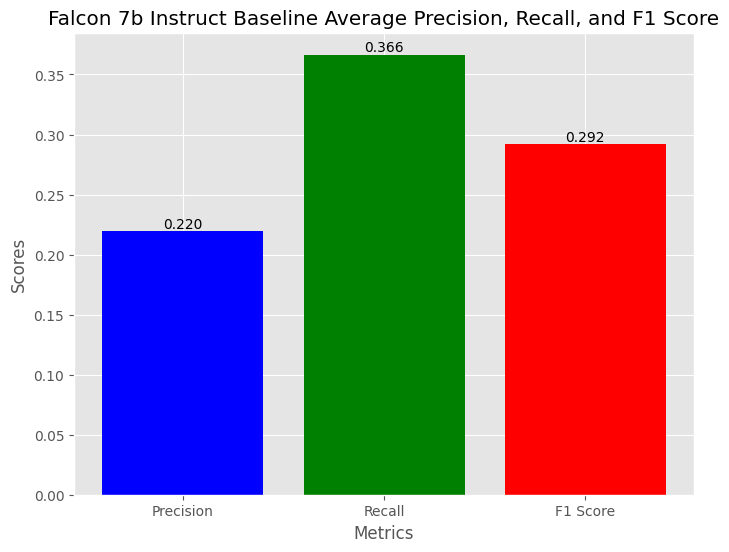

In [24]:
average_precision_BL = P_BL.mean()
average_recall_BL = R_BL.mean()
average_f1_BL = F1_BL.mean()

scores = [average_precision_BL, average_recall_BL, average_f1_BL]
labels = ['Precision', 'Recall', 'F1 Score']


plt.figure(figsize=(8, 6))

barlist = plt.bar(labels, scores, color=['blue', 'green', 'red'])

for idx, bar in enumerate(barlist):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{scores[idx]:.3f}', ha='center', va='bottom')


plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Falcon 7b Instruct Baseline Average Precision, Recall, and F1 Score')
plt.style.use('ggplot')


plt.show()

In [5]:
df_qa

,Question,Expected Answer,Actual Answer
0,What is an eigenvector of a matrix?,An eigenvector of a matrix is a nonzero vector...,What is an eigenvector of a matrix?The eigenve...
1,How does the second hidden layer of a deep lea...,Given the first hidden layer's description of ...,How does the second hidden layer of a deep lea...
2,What is the significance of an inner product i...,An inner product in a vector space provides a ...,What is the significance of an inner product i...
3,What background is assumed for readers of the ...,The book assumes readers have a computer scien...,What background is assumed for readers of the ...
4,What are the main goals of statistical learnin...,The main goals of statistical learning are to ...,What are the main goals of statistical learnin...
...,...,...,...
123,How does deep learning address the challenge o...,Deep learning introduces representations in te...,How does deep learning address the challenge o...
124,What is 'outlier detection' in machine learning?,Outlier detection in machine learning is the i...,What is 'outlier detection' in machine learnin...
125,What is 'long short-term memory' (LSTM) in mac...,Long short-term memory (LSTM) in machine learn...,What is 'long short-term memory' (LSTM) in mac...
126,What is 'hyperparameter tuning' in machine lea...,Hyperparameter tuning in machine learning invo...,What is 'hyperparameter tuning' in machine lea...


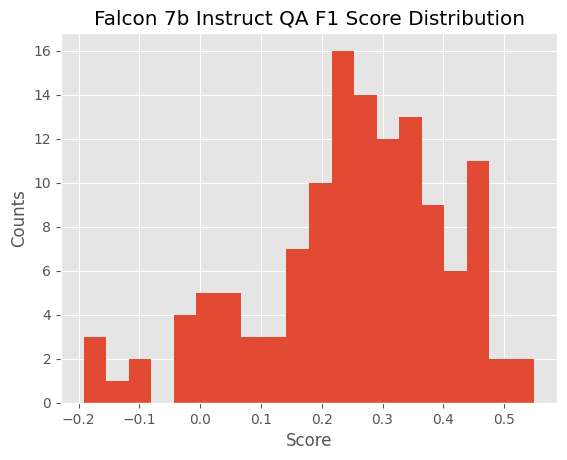

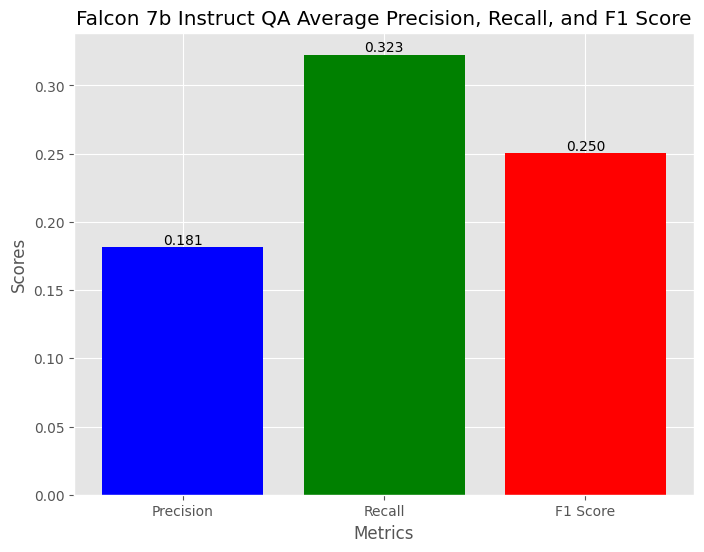

In [25]:

questions_QA = df_qa['Question'].tolist()
ideal_answers_QA = df_qa['Expected Answer'].tolist()
gen_answers_QA = df_qa['Actual Answer'].tolist()

# Score the QA dataset
P_QA, R_QA, F1_QA = scorer.score(gen_answers_QA, ideal_answers_QA)

# Plot the F1 score distribution for the QA data
plt.hist(F1_QA, bins=20)
plt.xlabel("Score")
plt.ylabel("Counts")
plt.title('Falcon 7b Instruct QA F1 Score Distribution')
plt.style.use('ggplot')
plt.show()

# Calculate average scores for the QA data
average_precision_QA = P_QA.mean()
average_recall_QA = R_QA.mean()
average_f1_QA = F1_QA.mean()

# Define the scores and labels for plotting
scores_QA = [average_precision_QA, average_recall_QA, average_f1_QA]
labels_QA = ['Precision', 'Recall', 'F1 Score']

# Create the bar chart for average scores
plt.figure(figsize=(8, 6))
barlist = plt.bar(labels_QA, scores_QA, color=['blue', 'green', 'red'])

# Add text labels to each bar
for idx, bar in enumerate(barlist):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{scores_QA[idx]:.3f}', ha='center', va='bottom')

# Set the labels and title for the bar chart
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Falcon 7b Instruct QA Average Precision, Recall, and F1 Score')
plt.style.use('ggplot')
plt.show()


In [6]:
df_raw

,Question,Expected Answer,Actual Answer
0,What is 'natural language processing' (NLP) in...,Natural language processing (NLP) in machine l...,What is 'natural language processing' (NLP) in...
1,Does Miniconda come with all the packages that...,"No, Miniconda does not come with all the packa...",Does Miniconda come with all the packages that...
2,Can the inverse matrix A−1 be used to solve Ax...,"Yes, if the inverse matrix A−1 exists, it can ...",Can the inverse matrix A−1 be used to solve Ax...
3,Is it necessary to be in the 'ml' environment ...,"Yes, it is necessary to always be in the 'ml' ...",Is it necessary to be in the'ml' environment w...
4,What is 'boosting' in machine learning?,Boosting in machine learning is an ensemble te...,What is 'boosting' in machine learning?Theory ...
...,...,...,...
503,Why is supervised machine learning considered ...,Supervised machine learning is considered easi...,Why is supervised machine learning considered ...
504,What is the significance of being able to gene...,Being able to generate the zero vector through...,What is the significance of being able to gene...
505,What is the relationship between columns of a ...,The relationship between columns of a matrix a...,What is the relationship between columns of a ...
506,What is 'regularization' in machine learning?,Regularization in machine learning is a techni...,What is'regularization' in machine learning?Th...


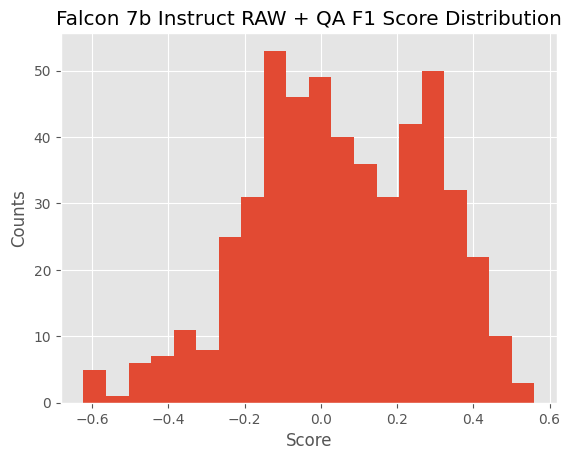

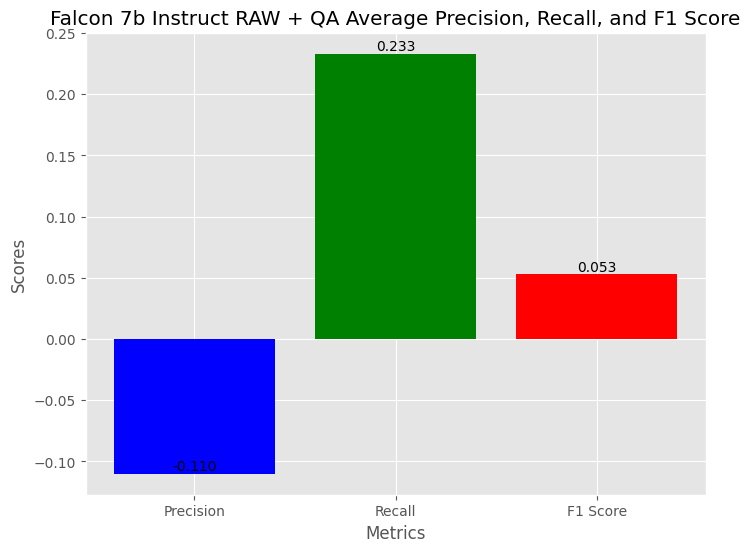

In [27]:
questions_RAW = df_raw['Question'].tolist()
ideal_answers_RAW = df_raw['Expected Answer'].tolist()
gen_answers_RAW = df_raw['Actual Answer'].tolist()

# Score the RAW dataset
P_RAW, R_RAW, F1_RAW = scorer.score(gen_answers_RAW, ideal_answers_RAW)

# Plot the F1 score distribution for the RAW data
plt.hist(F1_RAW, bins=20)
plt.xlabel("Score")
plt.ylabel("Counts")
plt.title('Falcon 7b Instruct RAW + QA F1 Score Distribution')
plt.style.use('ggplot')
plt.show()

# Calculate average scores for the RAW data
average_precision_RAW = P_RAW.mean()
average_recall_RAW = R_RAW.mean()
average_f1_RAW = F1_RAW.mean()

# Define the scores and labels for plotting
scores_RAW = [average_precision_RAW, average_recall_RAW, average_f1_RAW]
labels_RAW = ['Precision', 'Recall', 'F1 Score']

# Create the bar chart for average scores
plt.figure(figsize=(8, 6))
barlist = plt.bar(labels_RAW, scores_RAW, color=['blue', 'green', 'red'])

# Add text labels to each bar
for idx, bar in enumerate(barlist):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{scores_RAW[idx]:.3f}', ha='center', va='bottom')

# Set the labels and title for the bar chart
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Falcon 7b Instruct RAW + QA Average Precision, Recall, and F1 Score')
plt.style.use('ggplot')
plt.show()


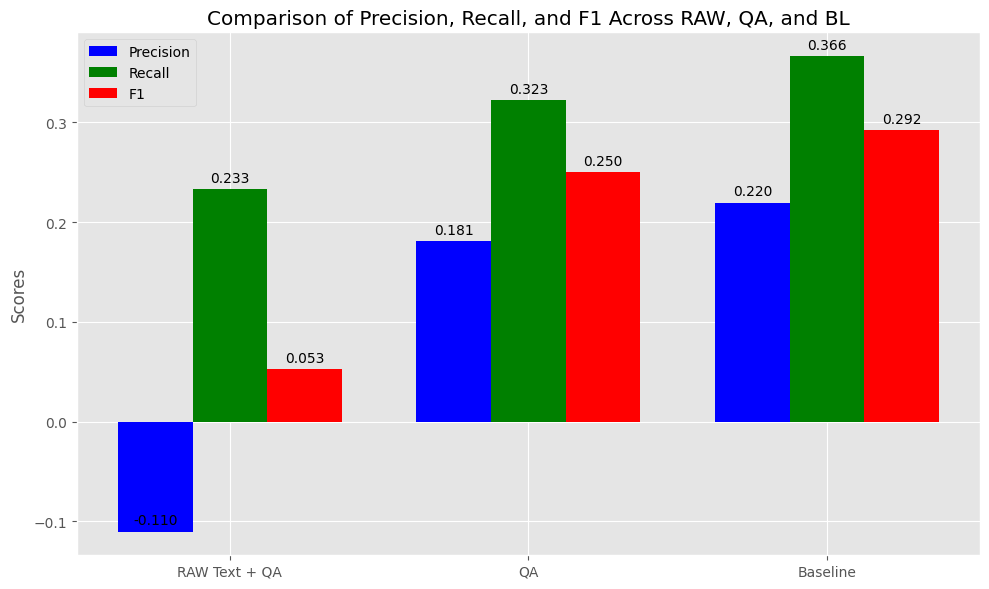

In [30]:

import numpy as np


# Grouping data
precisions = [average_precision_RAW, average_precision_QA, average_precision_BL]
recalls = [average_recall_RAW, average_recall_QA, average_recall_BL]
f1_scores = [average_f1_RAW, average_f1_QA, average_f1_BL]

# Setting up the bar plot
labels = ['RAW Text + QA', 'QA', 'Baseline']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# Creating the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creating bars
rects1 = ax.bar(x - width, precisions, width, label='Precision', color='blue')
rects2 = ax.bar(x, recalls, width, label='Recall', color='green')
rects3 = ax.bar(x + width, f1_scores, width, label='F1', color='red')

# Adding labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1 Across RAW, QA, and BL')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding text labels to each bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Showing the plot
plt.tight_layout()
plt.show()


In [25]:
#questions = df['Question'].tolist()
#ideal_answers = df['Expected Answer'].tolist()
#gen_answers = df['Actual Answer'].tolist()

questions = df['questions'].tolist()
ideal_answers = df['answer'].tolist()
gen_answers = df['model_answer'].tolist()

In [34]:
scorer = BERTScorer(lang="en", rescale_with_baseline=True)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
P, R, F1 = scorer.score([gen_answers[0]], [ideal_answers[0]])

In [43]:
P, R, F1 = scorer.score(["an eigenvector for a matrix is a column vector of the form (n - 1, a n ) such that (n - 1) n is the size of the matrix. The column vector corresponding to the eigenvector is the `i`-th element of the matrix, where `i` is the index of the row and column."], ["An eigenvector of a matrix is a nonzero vector that changes at most by a scalar factor when that matrix is applied to it."])

In [44]:
print(f"Precision: {P[0]:.3f}, Recall: {R[0]:.3f}, F1 Score: {F1[0]:.3f}")

Precision: 0.013, Recall: 0.287, F1 Score: 0.147


In [46]:

scorer = BERTScorer(lang="en", rescale_with_baseline=True)


P, R, F1 = scorer.score(gen_answers, ideal_answers)

print(f"System level F1 score: {F1.mean():.3f}")



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: ignored

System level F1 score: 0.292


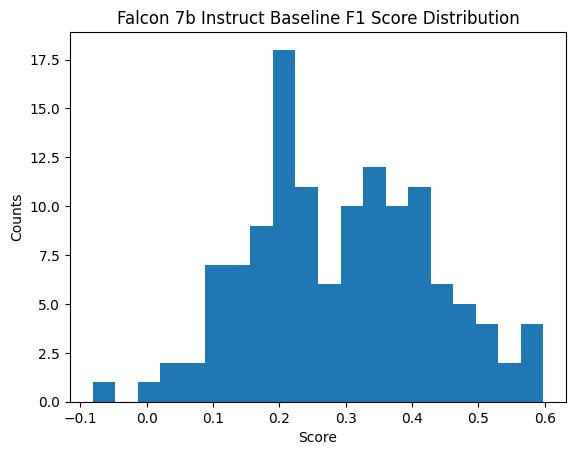

In [30]:
print(f"System level F1 score: {F1.mean():.3f}")


plt.hist(F1, bins=20)
plt.xlabel("Score")
plt.ylabel("Counts")
plt.title('Falcon 7b Instruct Baseline F1 Score Distribution')
plt.style.use('ggplot')
plt.show()


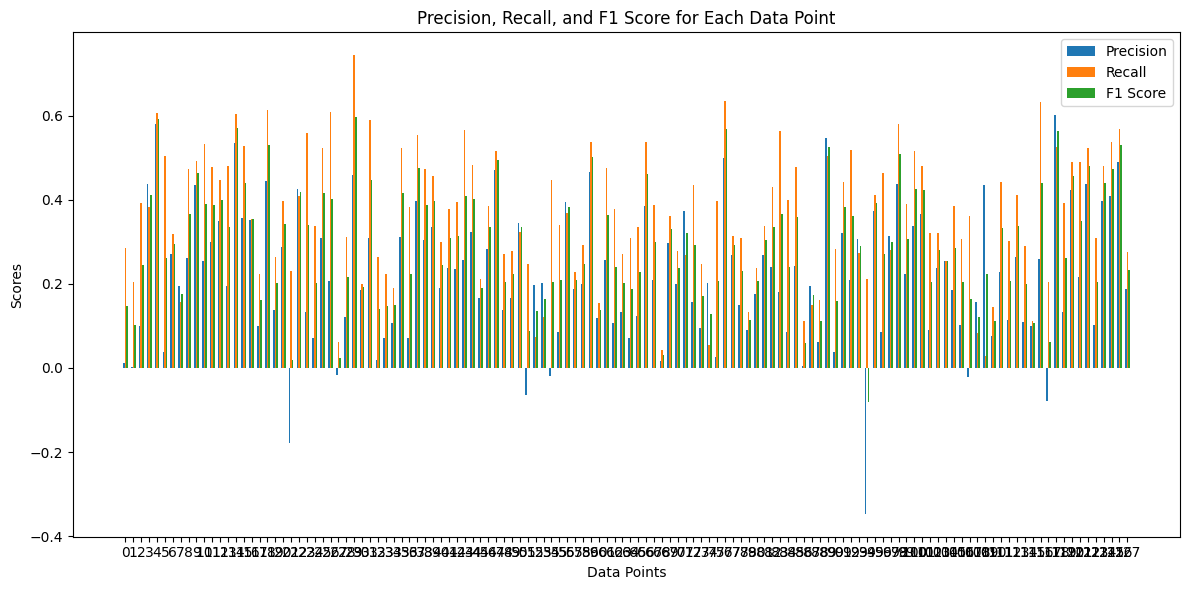

In [27]:
import numpy as np

P = np.array(P)
R = np.array(R)
F1 = np.array(F1)


num_points = len(P)


idx = np.arange(num_points)


bar_width = 0.2


plt.figure(figsize=(12, 6))


plt.bar(idx, P, bar_width, label='Precision')
plt.bar(idx + bar_width, R, bar_width, label='Recall')
plt.bar(idx + 2 * bar_width, F1, bar_width, label='F1 Score')

plt.xlabel('Data Points')
plt.ylabel('Scores')
plt.title('Precision, Recall, and F1 Score for Each Data Point')
plt.xticks(idx + bar_width, idx)


plt.legend()


plt.tight_layout()
plt.show()


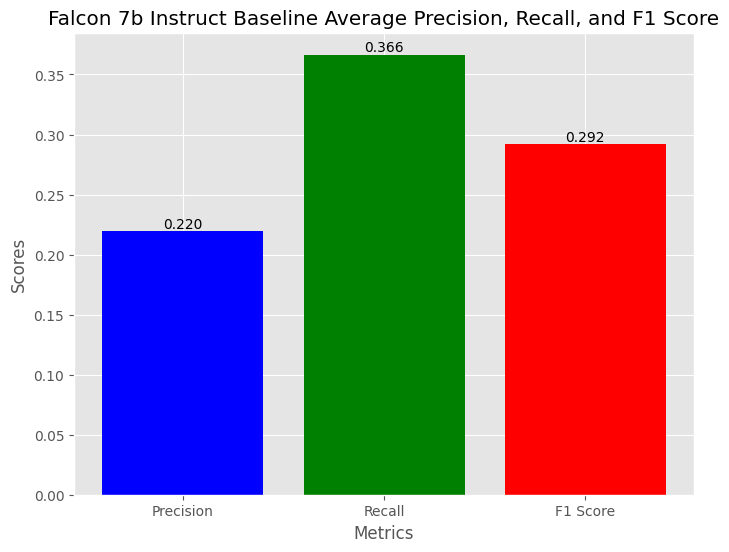

In [33]:


average_precision = P.mean()
average_recall = R.mean()
average_f1 = F1.mean()

scores = [average_precision, average_recall, average_f1]
labels = ['Precision', 'Recall', 'F1 Score']


plt.figure(figsize=(8, 6))

barlist = plt.bar(labels, scores, color=['blue', 'green', 'red'])

for idx, bar in enumerate(barlist):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{scores[idx]:.3f}', ha='center', va='bottom')


plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Falcon 7b Instruct Baseline Average Precision, Recall, and F1 Score')
plt.style.use('ggplot')


plt.show()
